## Bayesian Artificial Intelligence, Second Edition

Suppose that you know that a fever can be caused by the flu. You can use a thermometer,
which is fairly reliable, to test whether or not you have a fever. Suppose you also
know that if you take aspirin it will almost certainly lower a fever to normal. Some
people (about 5% of the population) have a negative reaction to aspirin. You’ll be
happy to get rid of your fever, as long as you don’t suffer an adverse reaction if you
take aspirin. (This is a variation of an example in Jensen, 2001.)

A decision network for this example is shown in Figure 4.5. The Flu node (the
cause) is a parent of the Fever (an effect). That symptom can be measured by a
thermometer, whose reading Therm may be somewhat unreliable. The decision is
represented by the decision node Take Aspirin. If the aspirin is taken, it is likely to get
rid of the fever. This change over time is represented by a second node FeverLater.
Note that the aspirin has no effect on the flu and, indeed, that we are not modeling the
possibility that the flu goes away. The adverse reaction to taking aspirin is represented
by Reaction. The utility node, U, shows that the utilities depend on whether or not the
fever is reduced and whether the person has an adverse reaction. The decision table
computed for this network is given in Table 4.2 (highest expected utility in each case
in bold). Note the observing a high temperature changes the decision to taking the
aspirin, but further information about having a reaction reverses that decision.

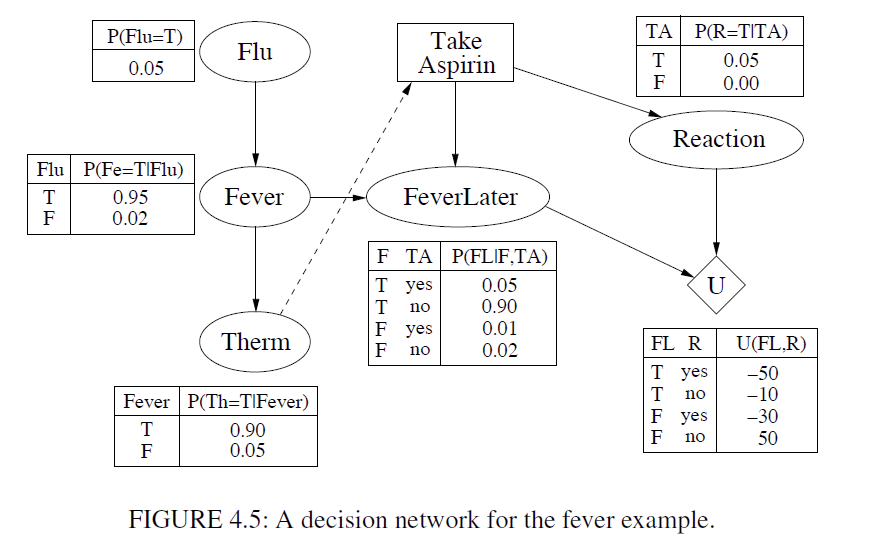

In [2]:
# imports
import os
import matplotlib.pyplot as plt
from pylab import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from IPython.display import display,HTML

In [15]:
# create influence diagram
diag = gum.InfluenceDiagram()

In [16]:
# CHANCE + DECISION VARIABLES

# chance: flu either True or False
FLU = diag.addChanceNode(gum.LabelizedVariable('FLU','Flu',["T","F"])) 

# chance: fever either True or False
FEVER = diag.addChanceNode(gum.LabelizedVariable('FEVER','Fever',["T","F"])) 

# chance: thermometer not completely accurate: True or False
THERM = diag.addChanceNode(gum.LabelizedVariable('THERM','Thermometer',["T","F"])) 

# chance: fever later True or False
FEVERLATER = diag.addChanceNode(gum.LabelizedVariable('FEVERLATER','fever later' ,["T","F"])) 

# decision: Take Asperin either yes or no
TA = diag.addDecisionNode(gum.LabelizedVariable('TA', 'TA', ["yes", "no"]))  

# chance: Reaction yes or no
REACTION = diag.addChanceNode(gum.LabelizedVariable('REACTION','reaction' ,["yes","no"])) 


In [17]:
# ARCS
diag.addArc(FLU, FEVER)
diag.addArc(FEVER, THERM)
diag.addArc(FEVER, FEVERLATER)
diag.addArc(TA, FEVERLATER)
diag.addArc(TA, REACTION)
diag.addArc(THERM, TA)

In [19]:
# UTILITY
U=diag.addUtilityNode(gum.LabelizedVariable("U", "U", 1))

# add arcs
diag.addArc(FEVERLATER, U)
diag.addArc(REACTION, U)

Influence Diagram{
  chance: 5,
  utility: 1,
  decision: 1,
  arcs: 8,
  domainSize: 64
}


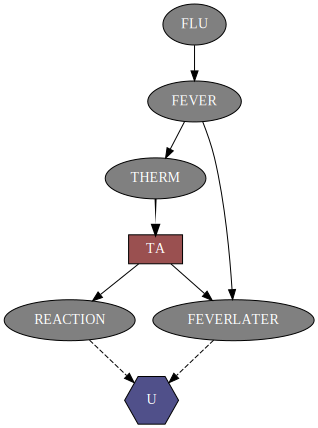

In [20]:
print(diag)
gnb.showInfluenceDiagram(diag, size=60)


In [48]:
# CPT's

# FLU, 5% chance it's flu
diag.cpt(FLU)[0] = 0.05
diag.cpt(FLU)[1] = 0.95

# FEVER, if flu probability fever = 95%, if no flu 2% probability of fever
diag.cpt(FEVER)[{'FLU':0}] = [0.95, 0.05]
diag.cpt(FEVER)[{'FLU':1}] = [0.02, 0.98]

# THERM probability of detecting fever by thermometer
diag.cpt(THERM)[{'FEVER':0}] = [0.9, 0.1]
diag.cpt(THERM)[{'FEVER':1}] = [0.05, 0.95]

# REACTION probability of a reaction to Asperin
diag.cpt(REACTION)[{'TA':0}] = [0.05, 0.95]
diag.cpt(REACTION)[{'TA':1}] = [0.00, 1.00]

# FEVERLATER
diag.cpt(FEVERLATER)[{'TA':0, 'FEVER': 0}] = [0.05, 0.95]
diag.cpt(FEVERLATER)[{'TA':0, 'FEVER': 1}] = [0.01, 0.99]
diag.cpt(FEVERLATER)[{'TA':1, 'FEVER': 0}] = [0.9, 0.1]
diag.cpt(FEVERLATER)[{'TA':1, 'FEVER': 1}] = [0.02, 0.98]

In [49]:
gnb.flow.row(diag.cpt(FLU), 
    diag.cpt(FEVER), 
    diag.cpt(THERM), 
    diag.cpt(REACTION),          
    diag.cpt(FEVERLATER),
    captions=["prior of FLU", 
              "prior of FEVER", 
              "prior of THERM",
              "prior of REACTION",
             "prior of FEVERLATER"])

In [50]:
pot = diag.utility('U')  # get all permutations via potential object

for i in pot.loopIn():  
    d = i.todict()   # transform to dict
    print(d)



{'U': '0', 'FEVERLATER': 'T', 'REACTION': 'yes'}
{'U': '0', 'FEVERLATER': 'F', 'REACTION': 'yes'}
{'U': '0', 'FEVERLATER': 'T', 'REACTION': 'no'}
{'U': '0', 'FEVERLATER': 'F', 'REACTION': 'no'}


In [68]:
diag.utility(U)[{'FEVERLATER': 'T', 'REACTION': 'yes'}] = -50  # -50
diag.utility(U)[{'FEVERLATER': 'T', 'REACTION': 'no'}] = -30   # -10
diag.utility(U)[{'FEVERLATER': 'F', 'REACTION': 'yes'}] = -30  # -30
diag.utility(U)[{'FEVERLATER': 'F', 'REACTION': 'no'}] = 50    #  50


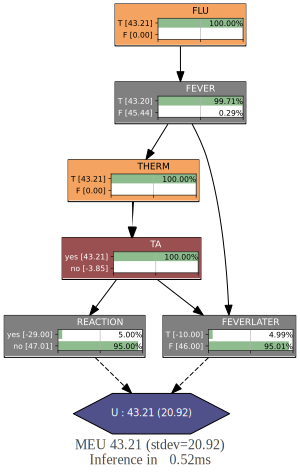

In [73]:
# create inference
ie = gum.ShaferShenoyLIMIDInference(diag) 
gnb.showInference(diag, engine=ie, evs={'FLU': 0, 'THERM':0}, size=15)

# {'THERM':1}